In [4]:
import pandas as pd
import numpy as np
from scipy.signal import welch, stft
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler


In [14]:
# Plot the time-domain signal
def plot_signal(signals_dict, title, N, fs=125, nperseg=64):
    
    t = np.arange(0, N) / fs
    
    # Plot the STFT
    plt.figure(figsize=(30, 4*len(signals_dict)))
    plot_h = len(signals_dict)
    for j, (channel, signals) in enumerate(signals_dict.items()):
        plot_w = signals.shape[0]
        for i in range(plot_w):
            signal = signals[i]
            f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg)  # You can adjust nperseg for desired time and frequency resolution
            Zxx = Zxx[1:, 1:]
            f = f[1:]
            t = t[1:]
            Zxx = 20 * np.log10(np.abs(Zxx))
            print(Zxx.shape)
            plt.subplot(plot_h, plot_w, (i+1) + plot_w*j)
            # plt.figure(figsize=(10, 4))
            plt.pcolormesh(t, f, Zxx)
            plt.title(f"Short-Time Fourier Transform (STFT) - Channel {channel} - window_{i}")
            plt.xlabel("Time (sec)")
            plt.ylabel("Frequency (Hz)")
            plt.colorbar(label="dB")
            plt.grid(True)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
      

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


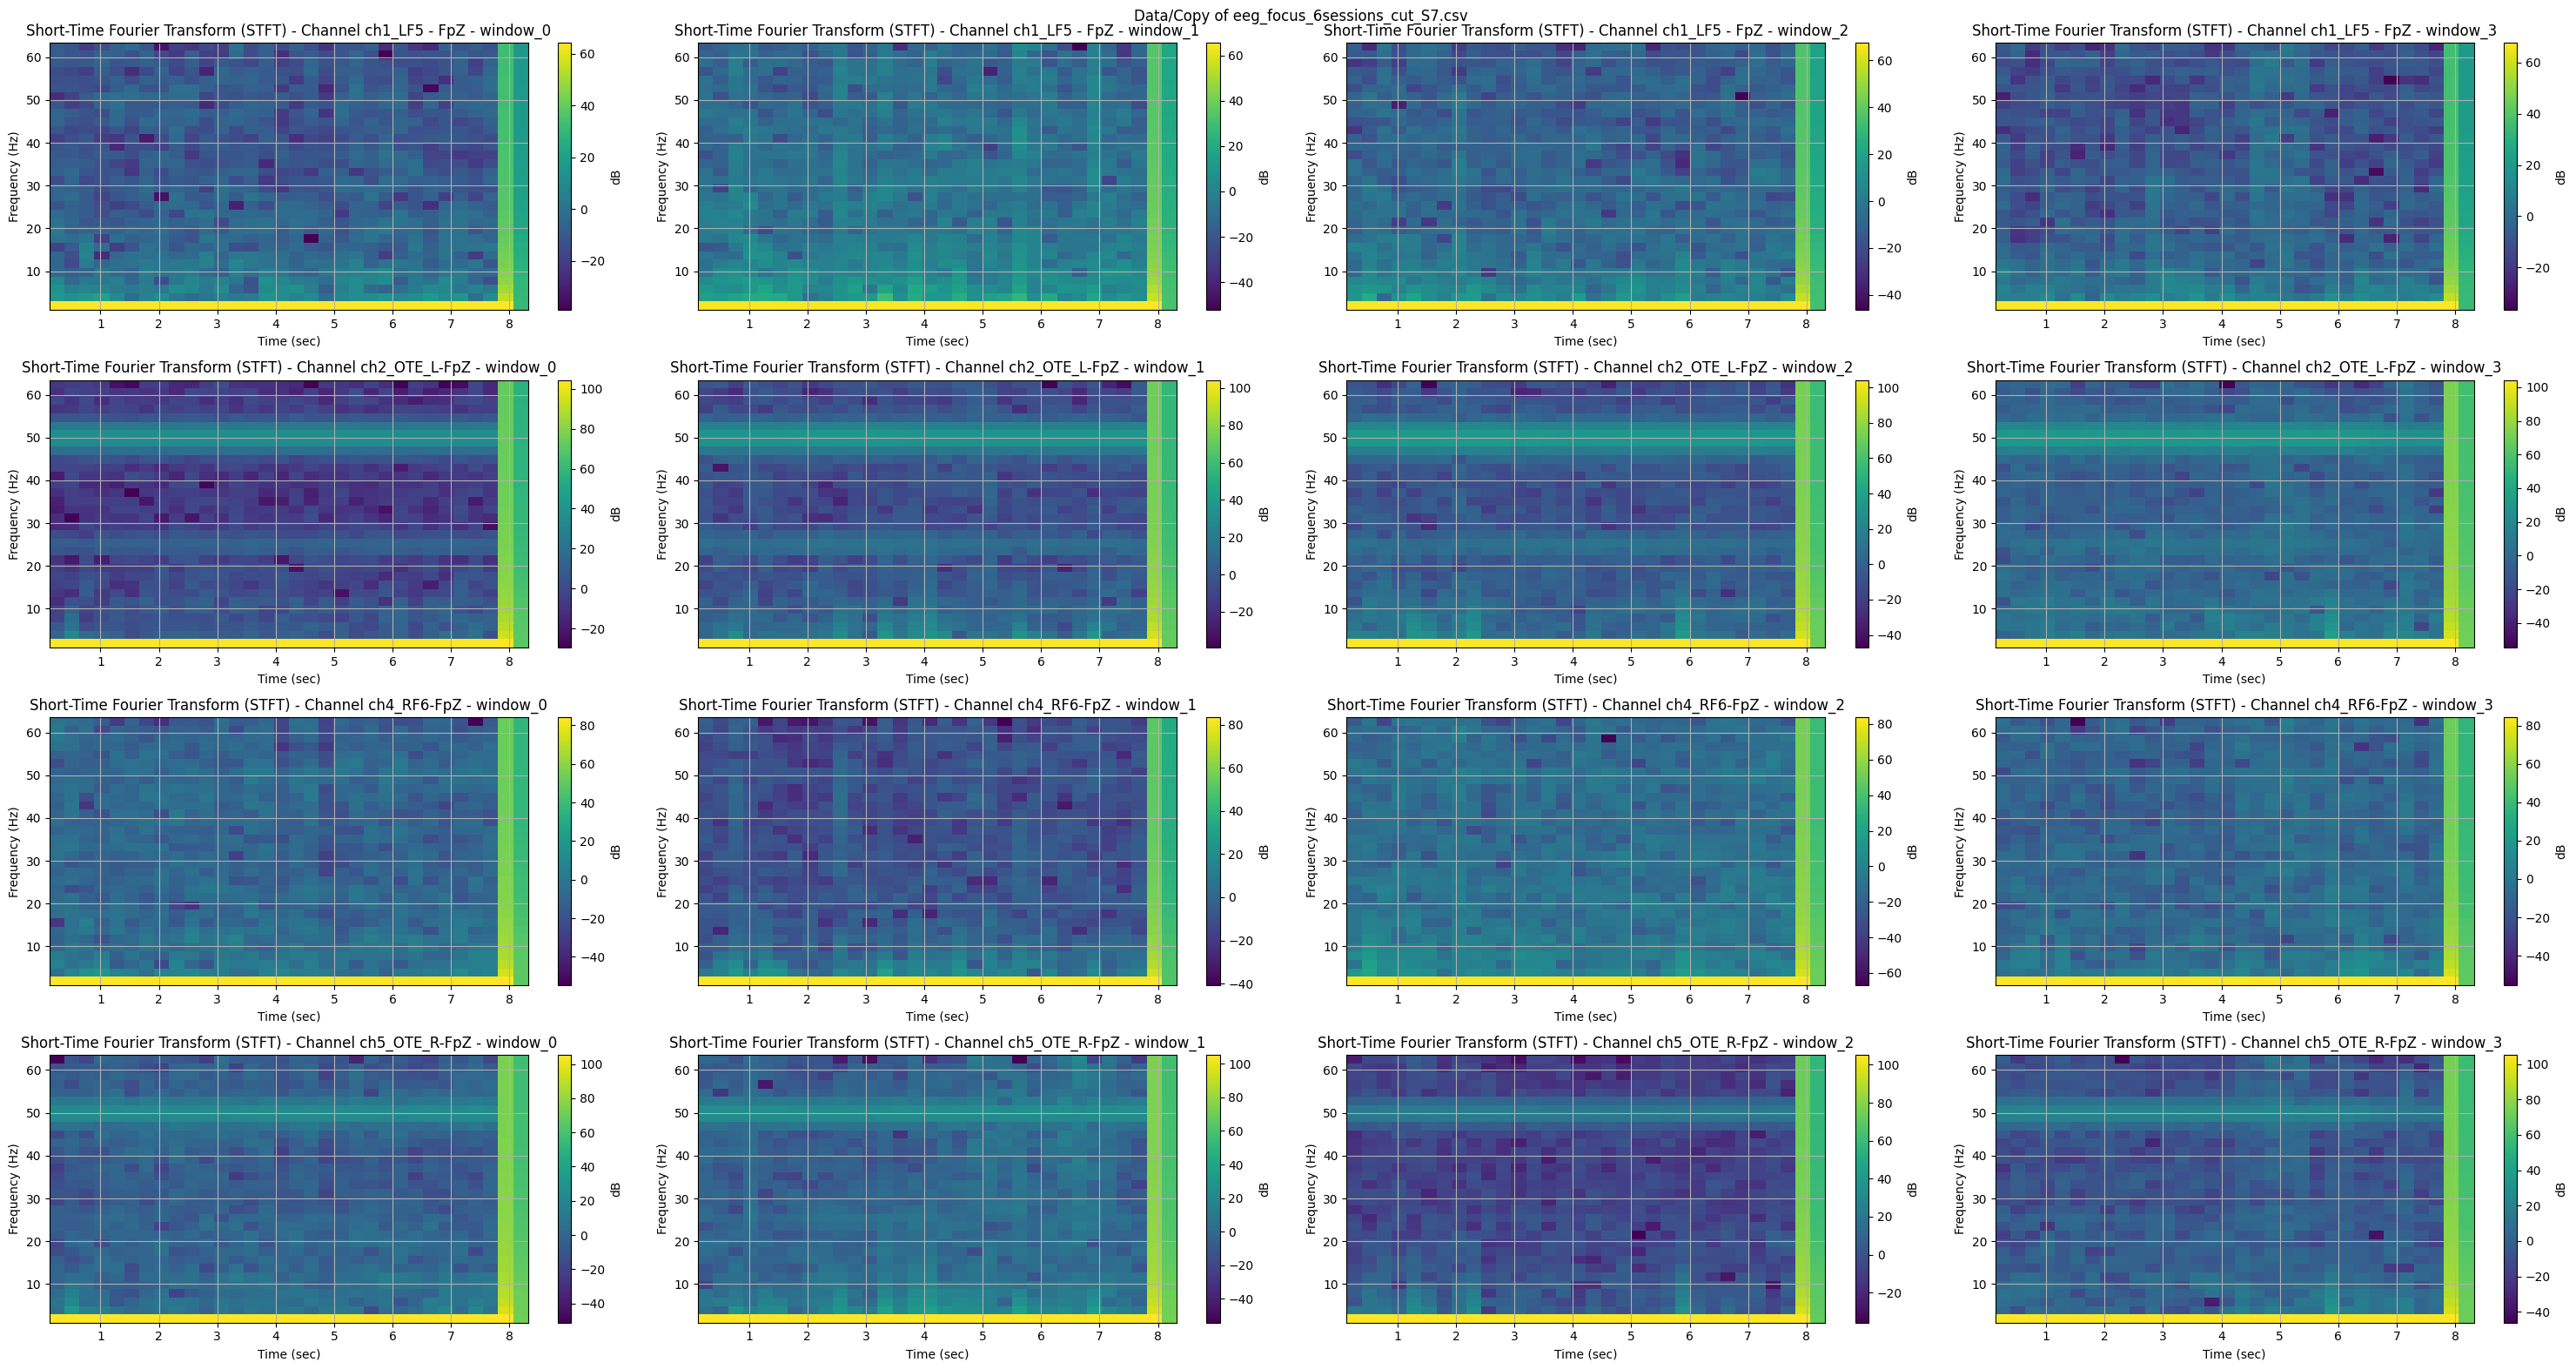

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


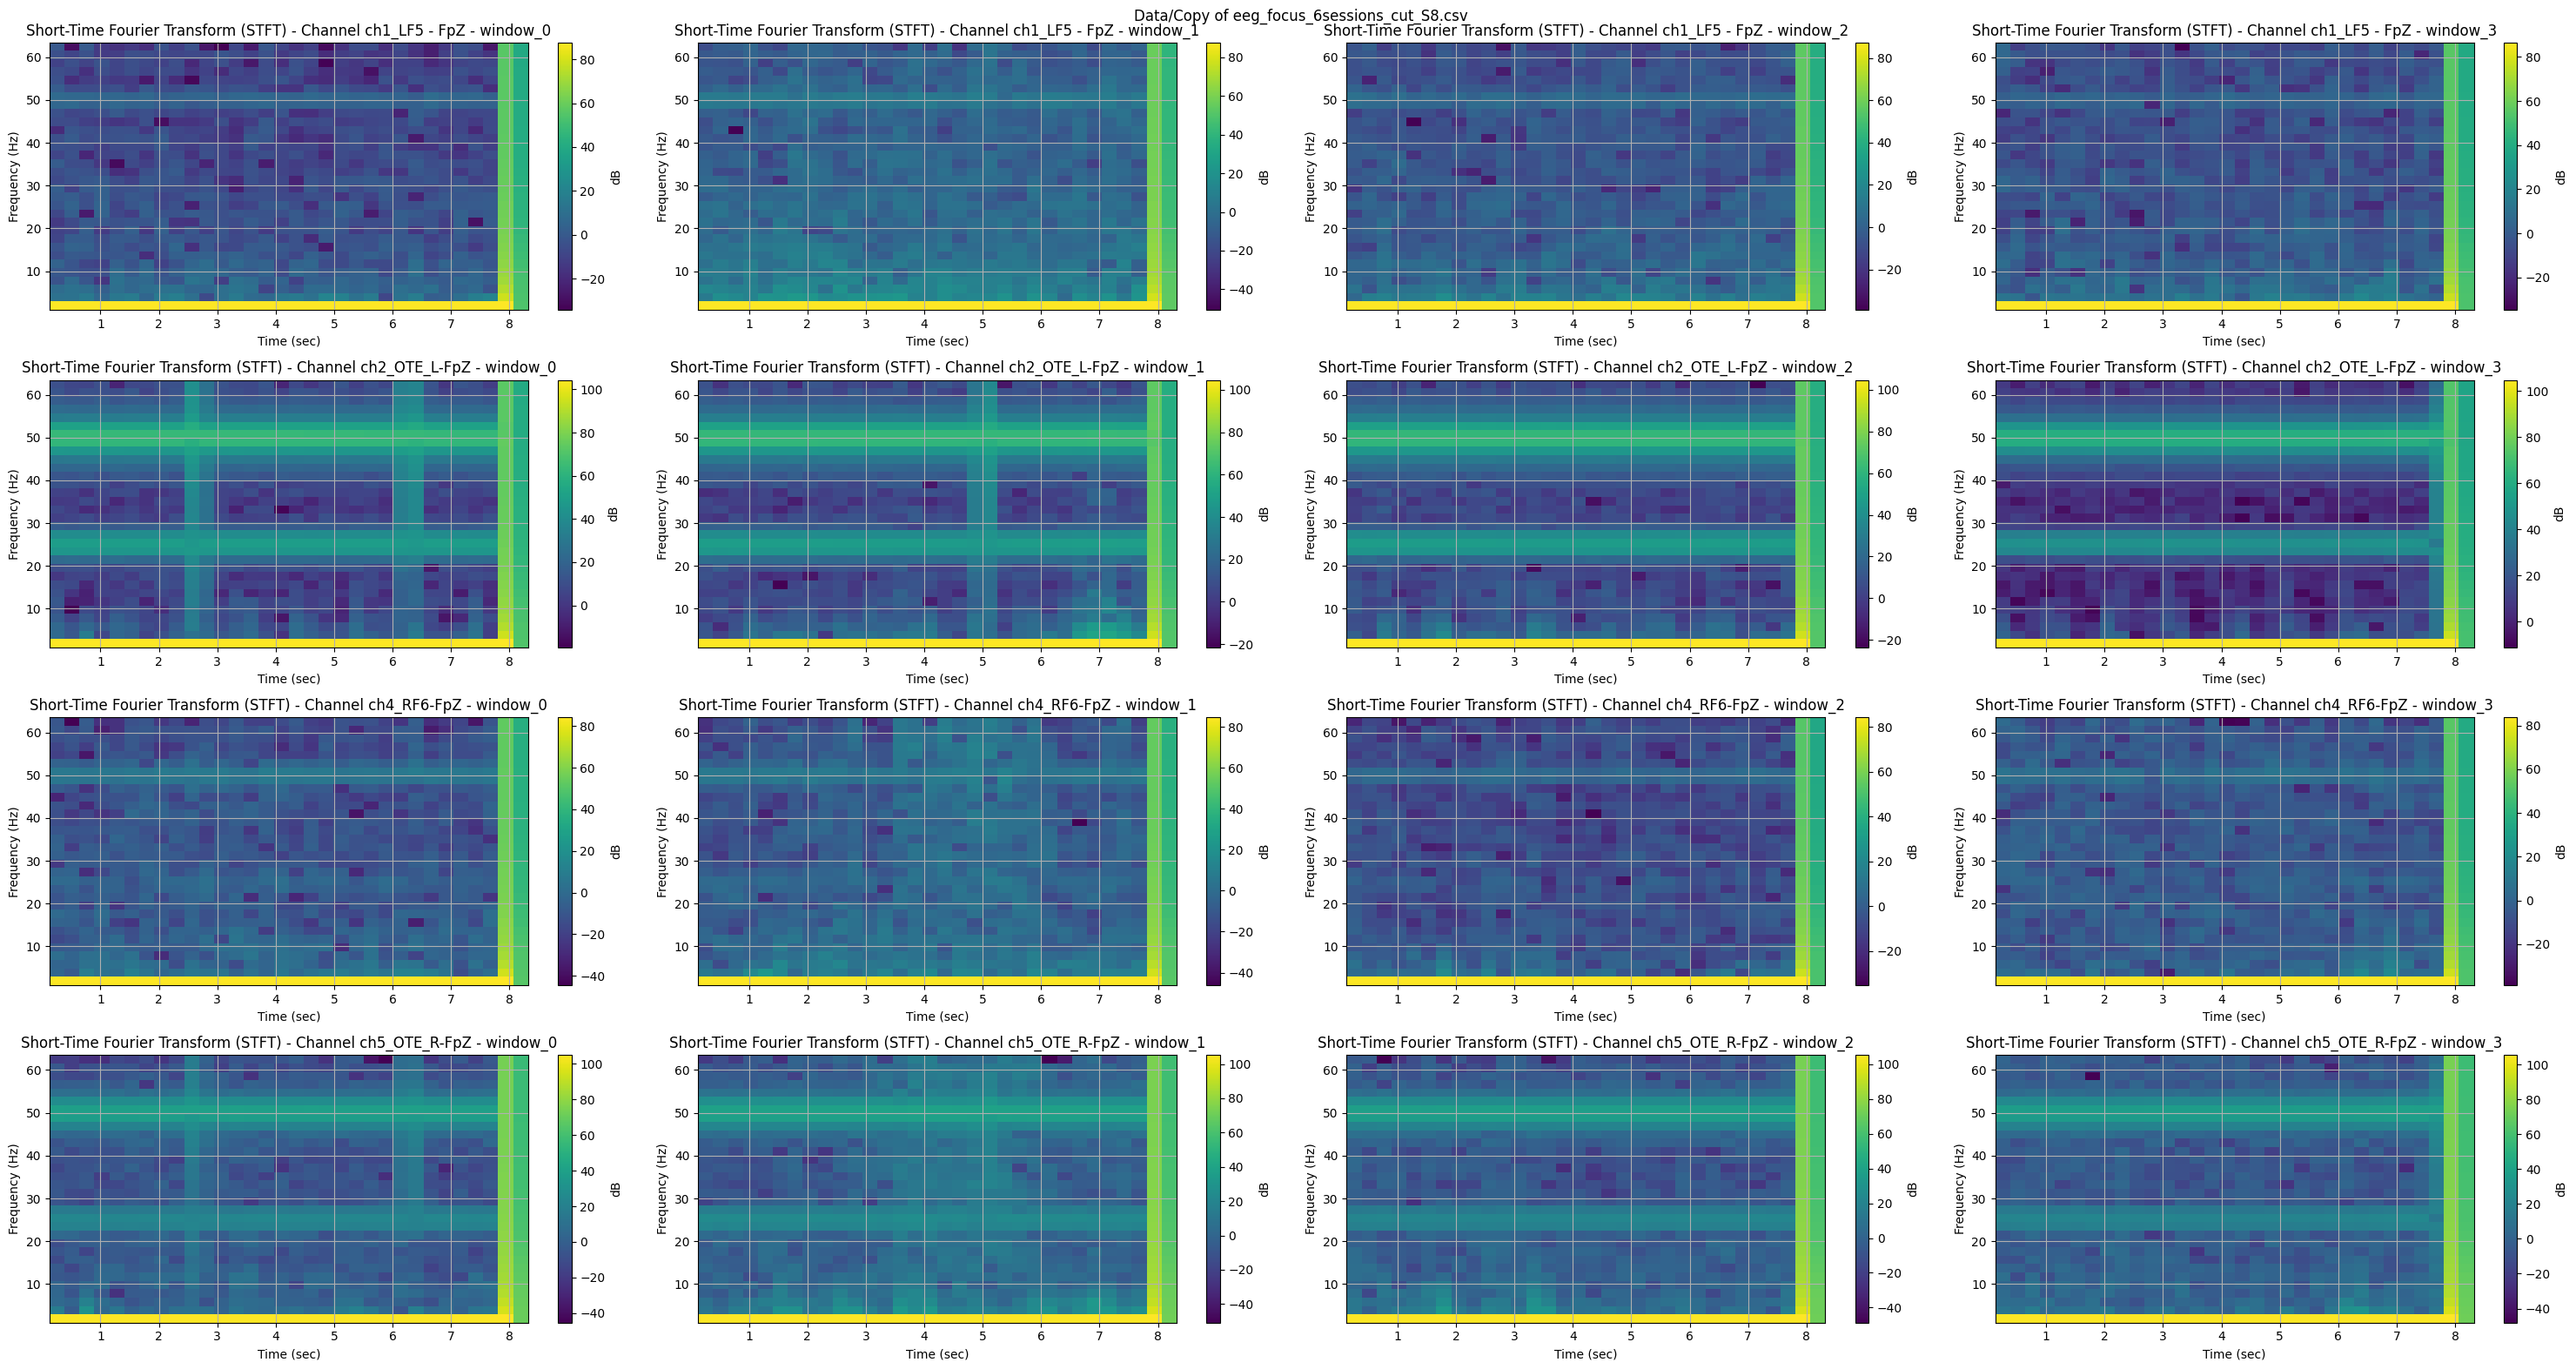

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


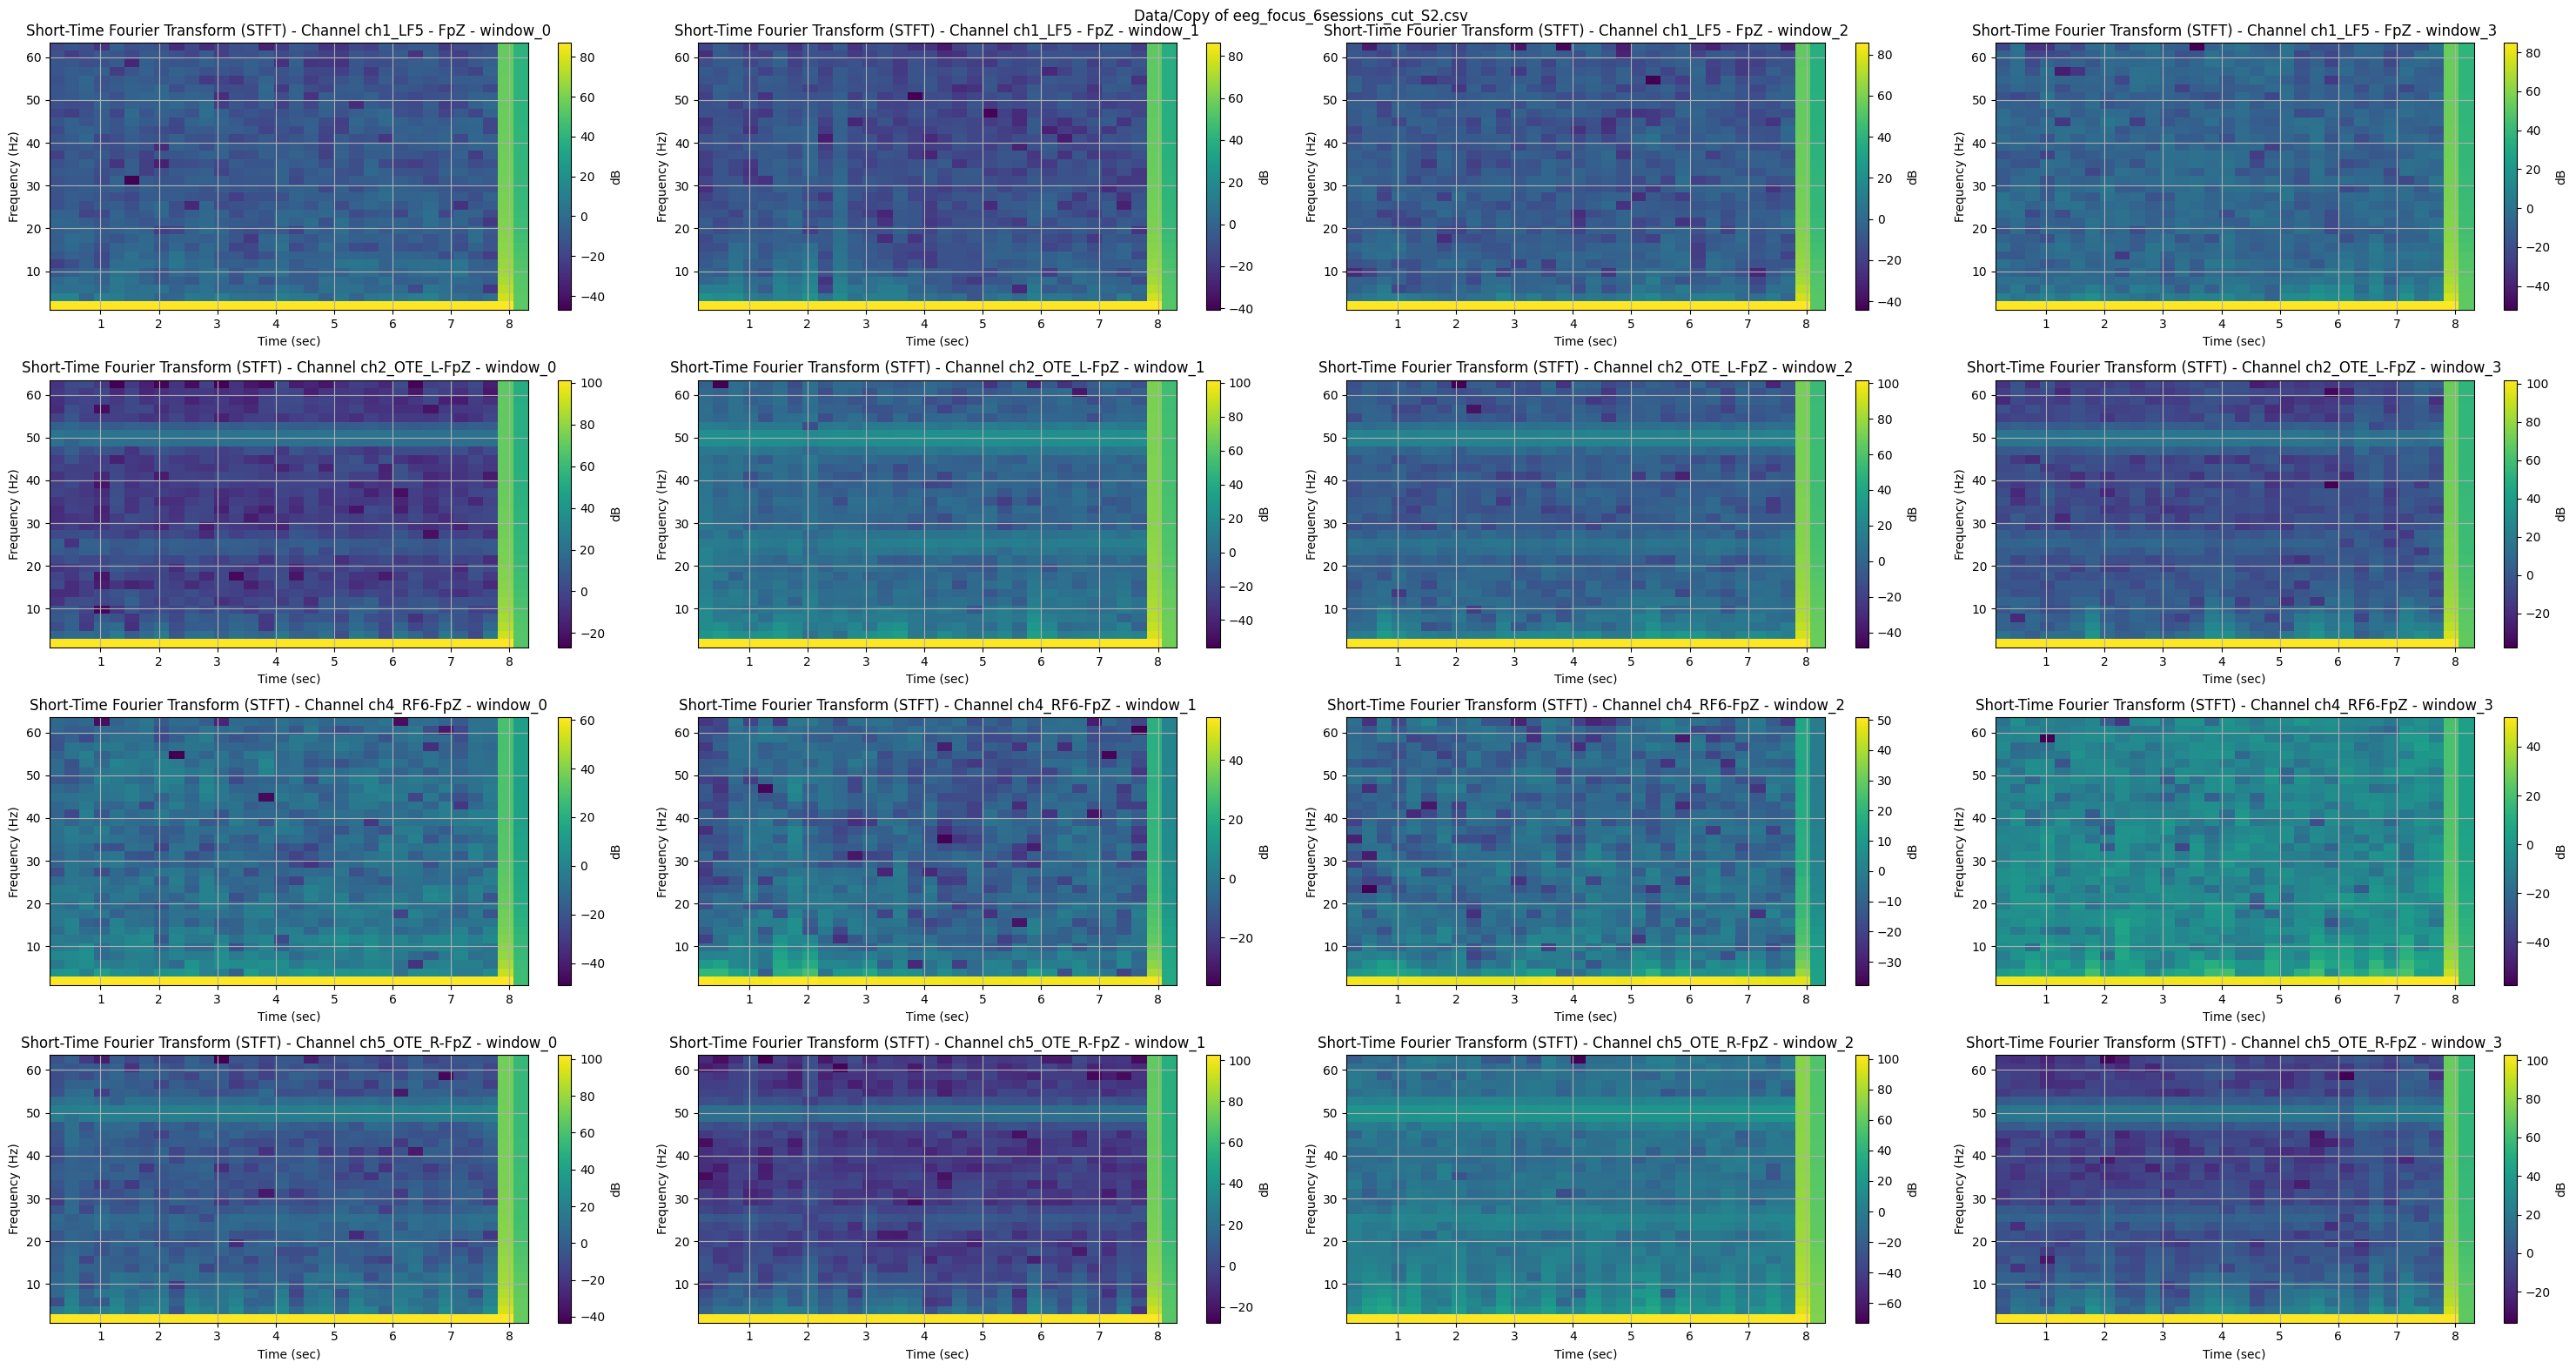

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


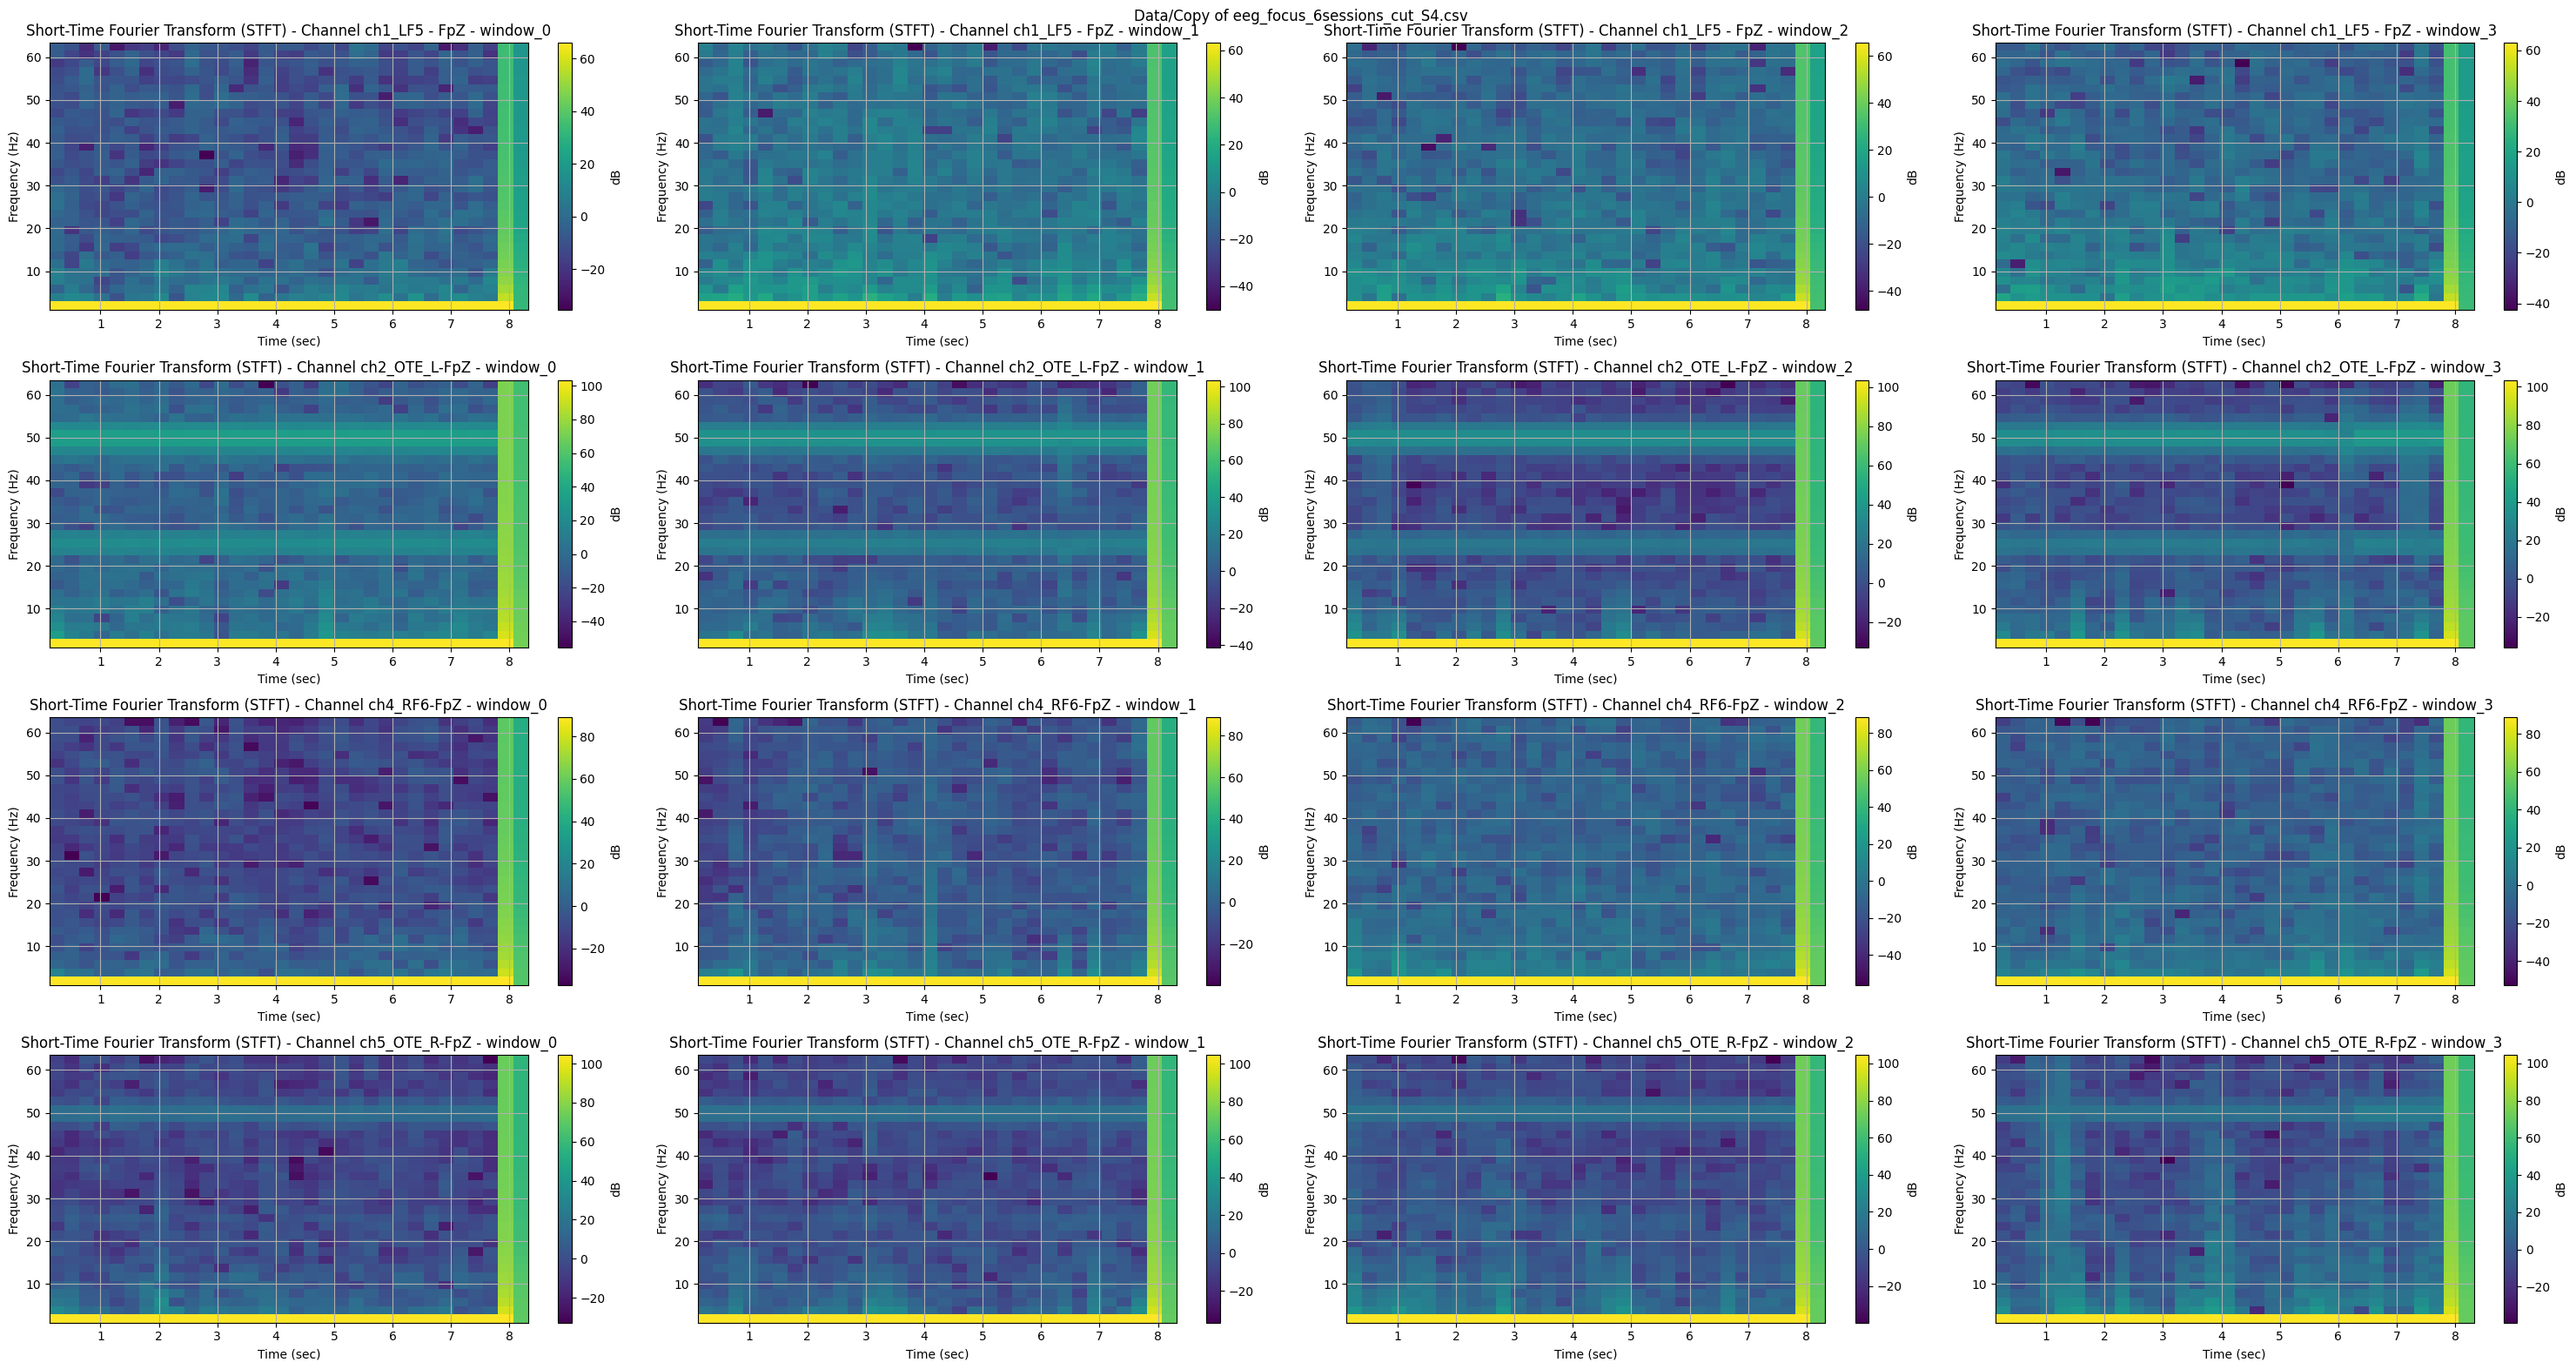

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


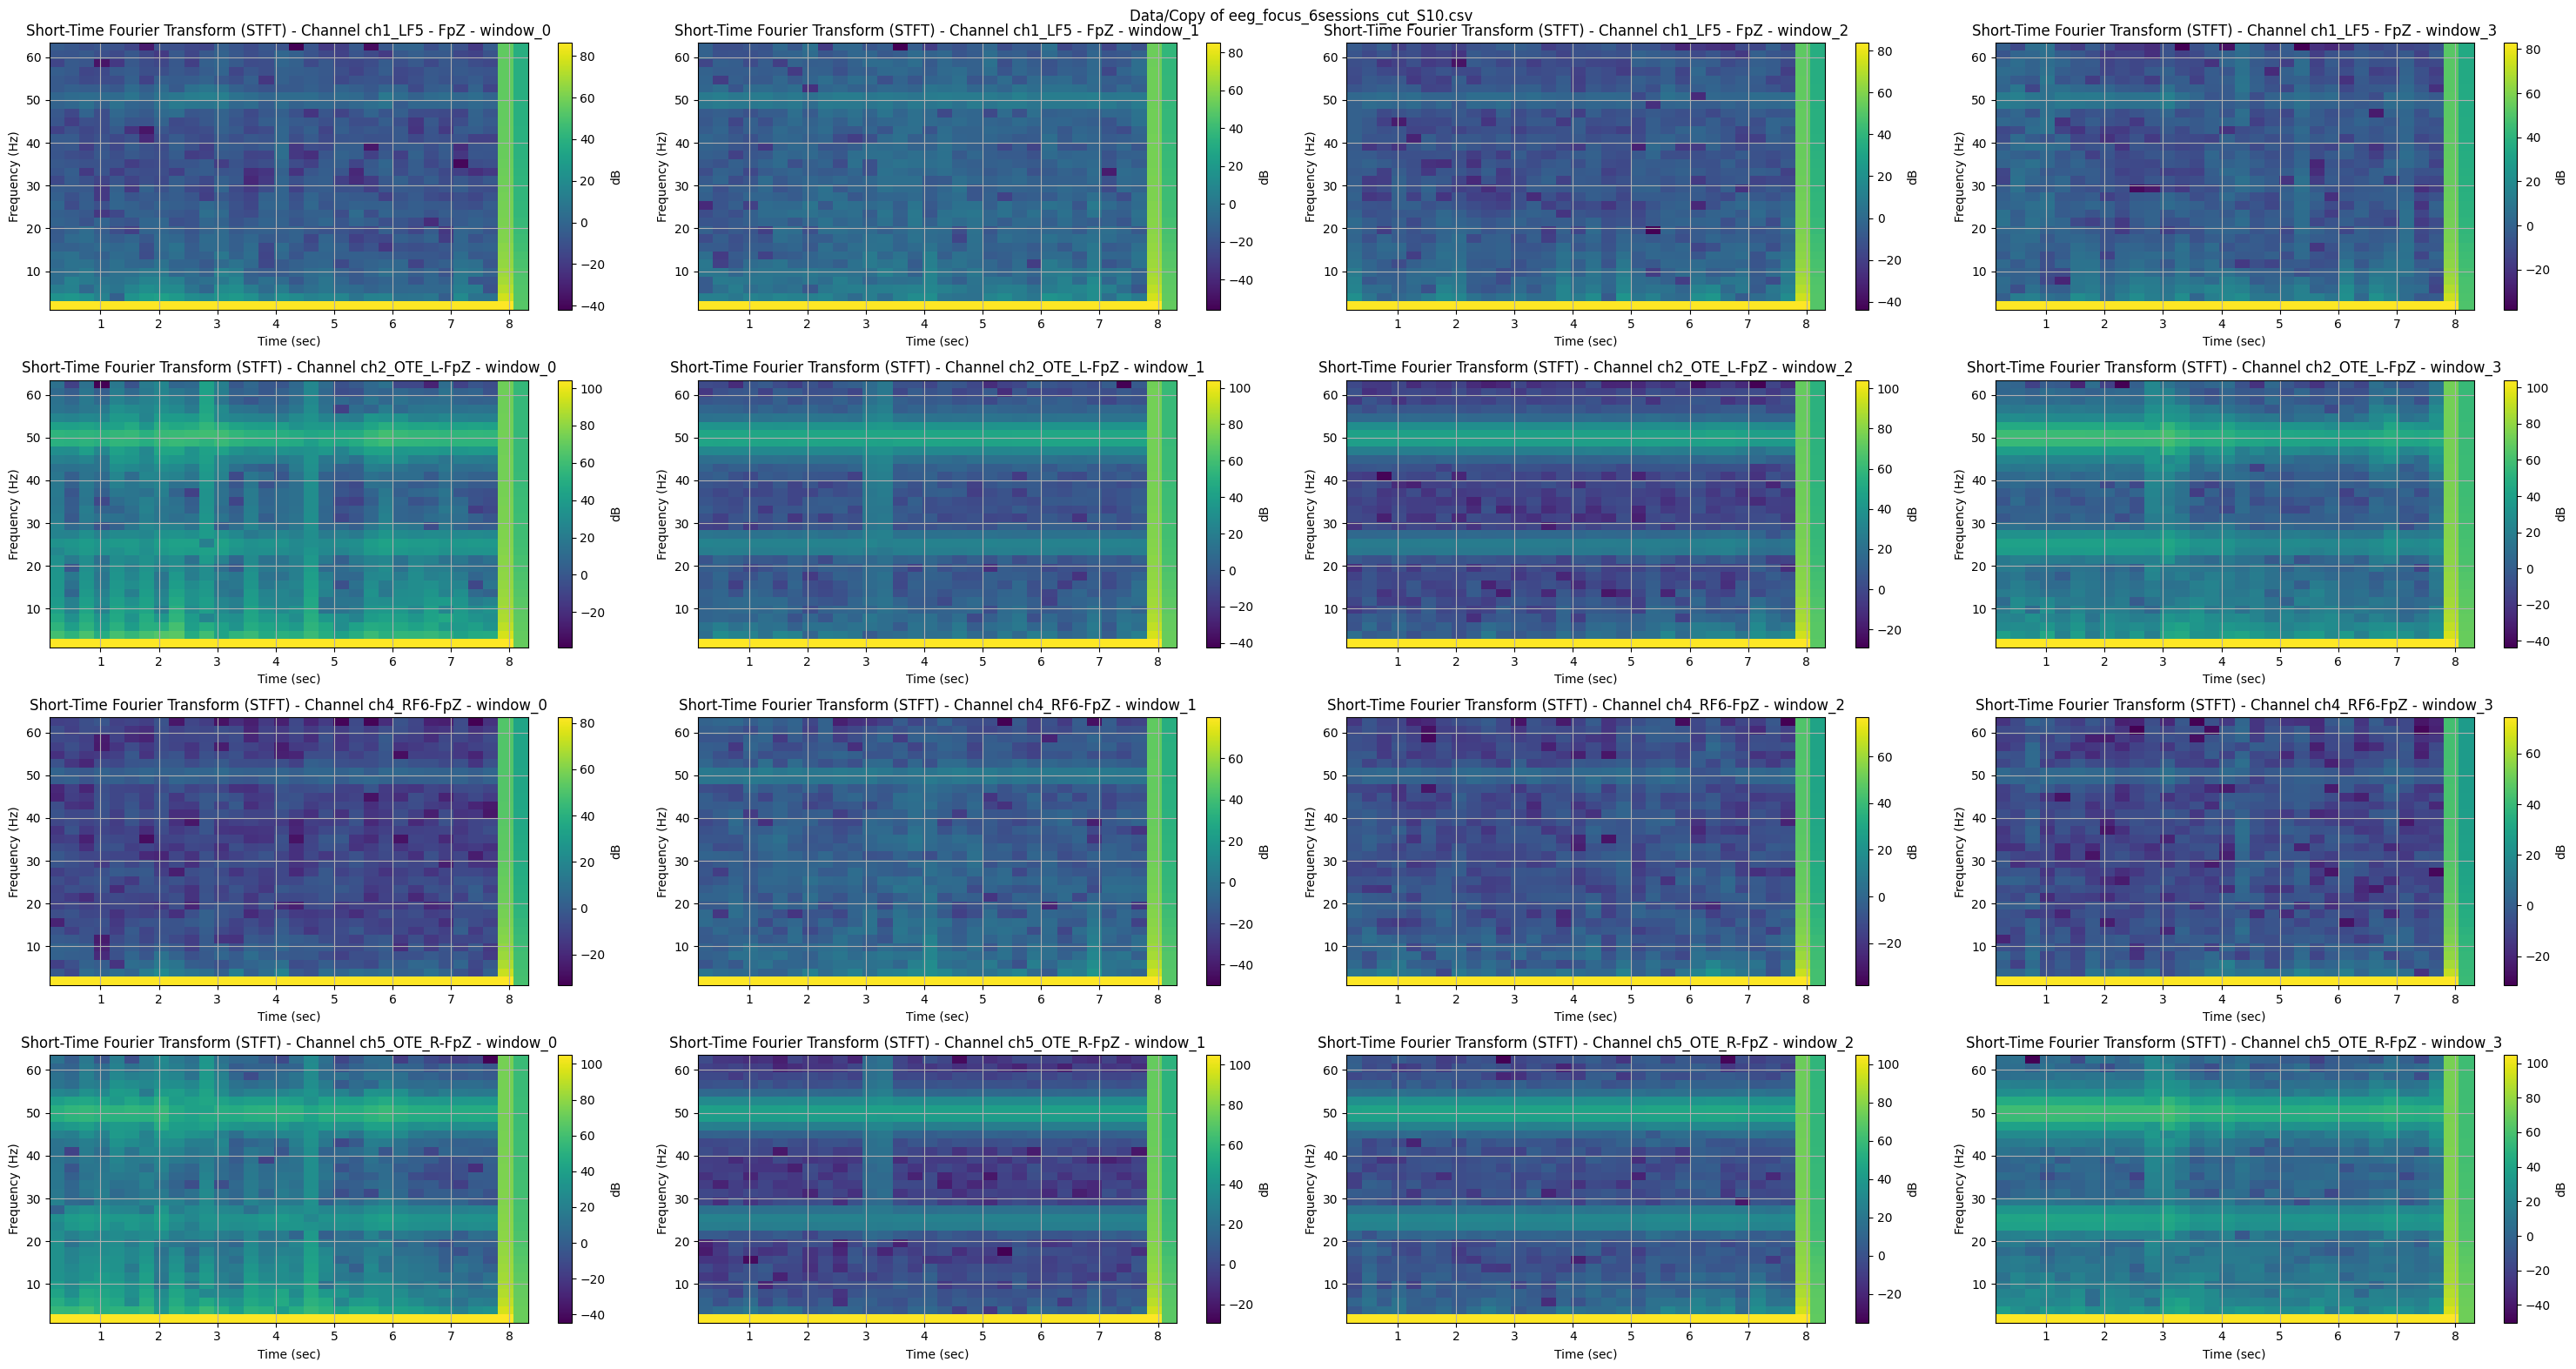

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


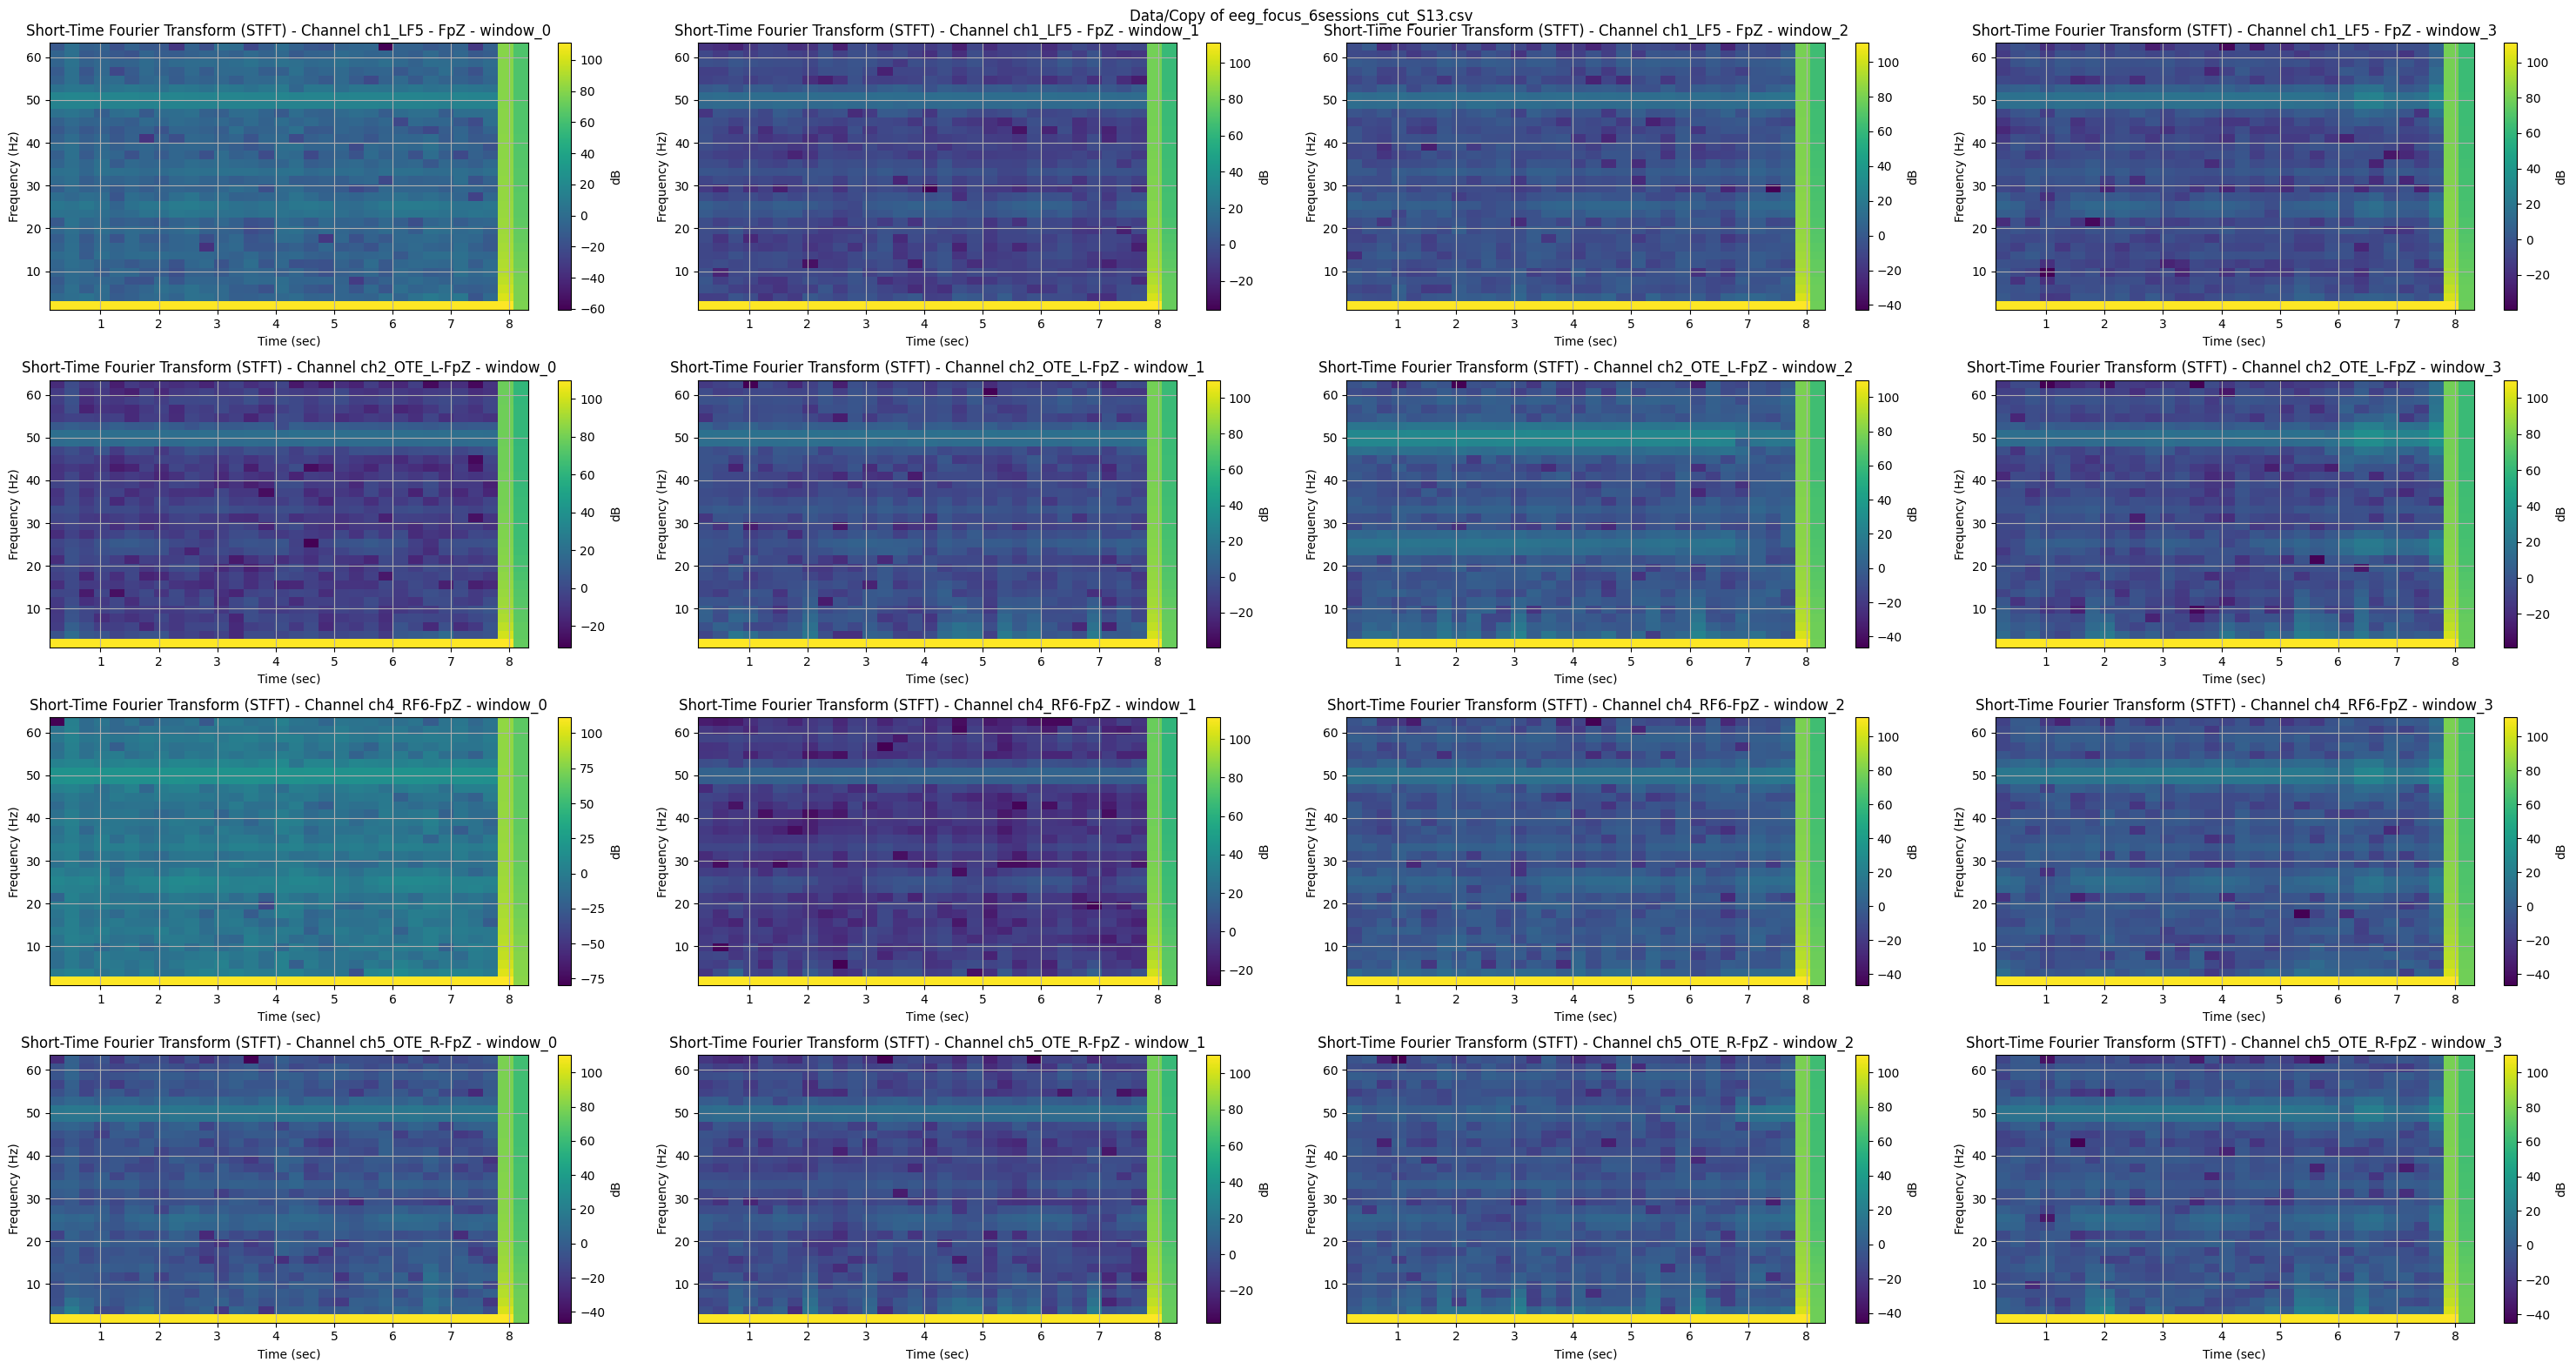

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


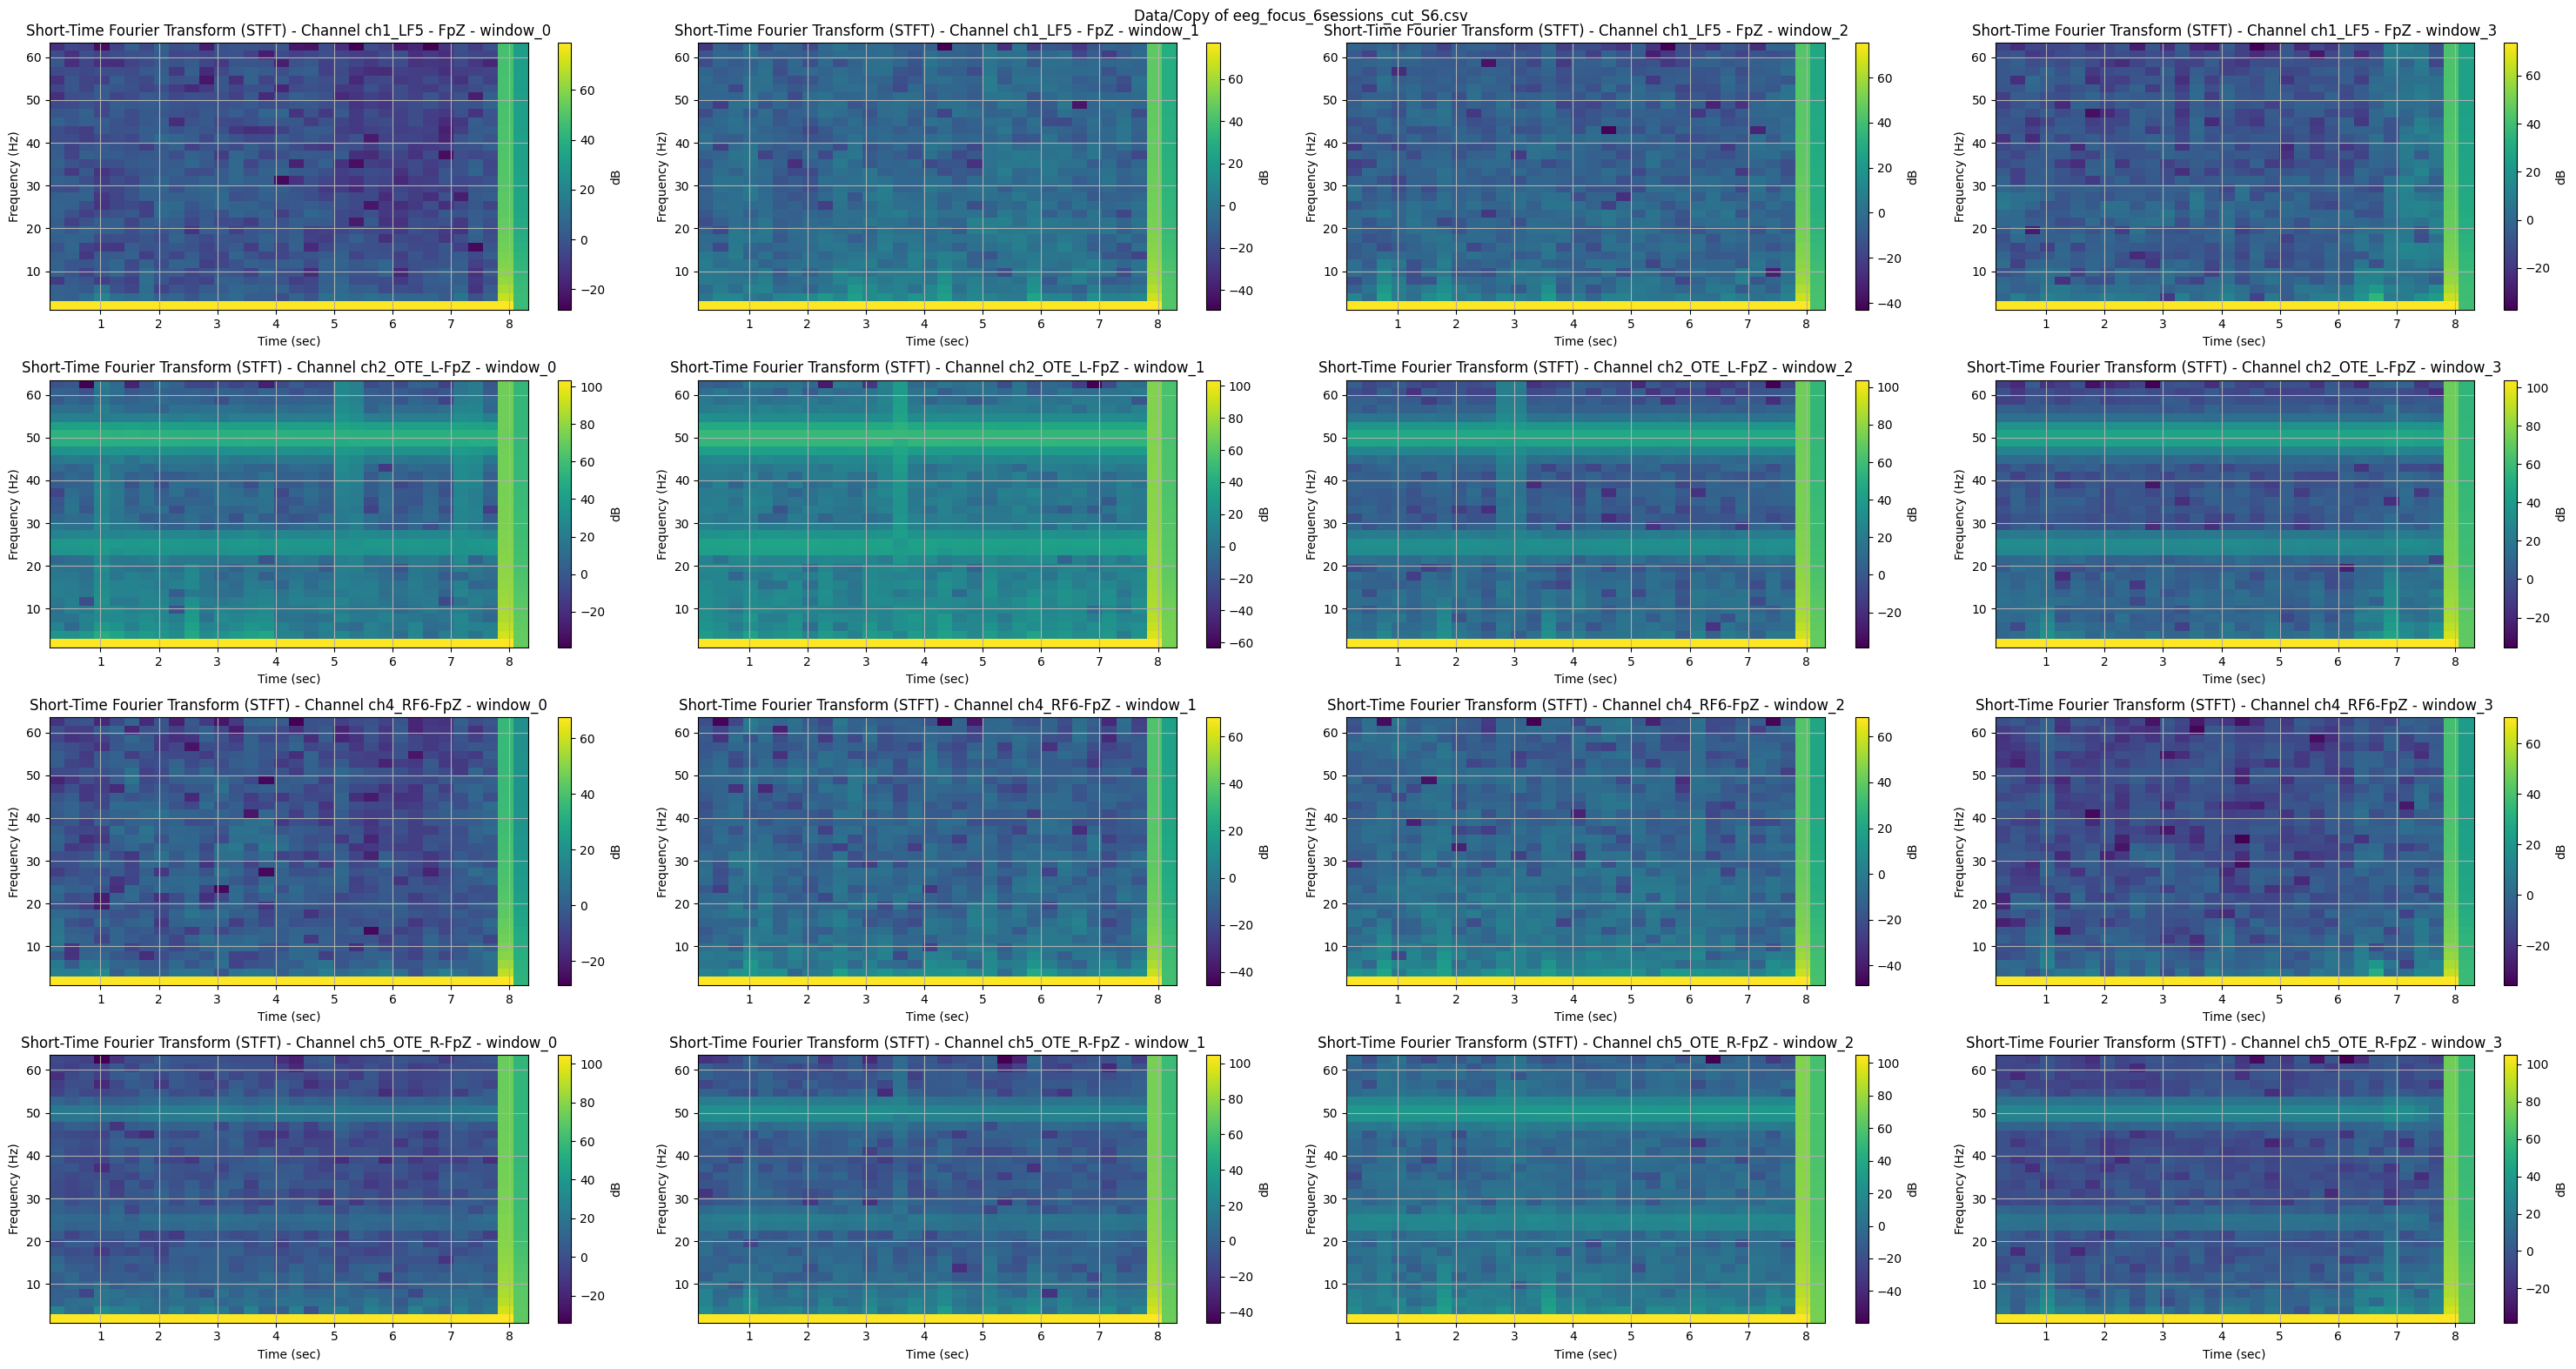

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


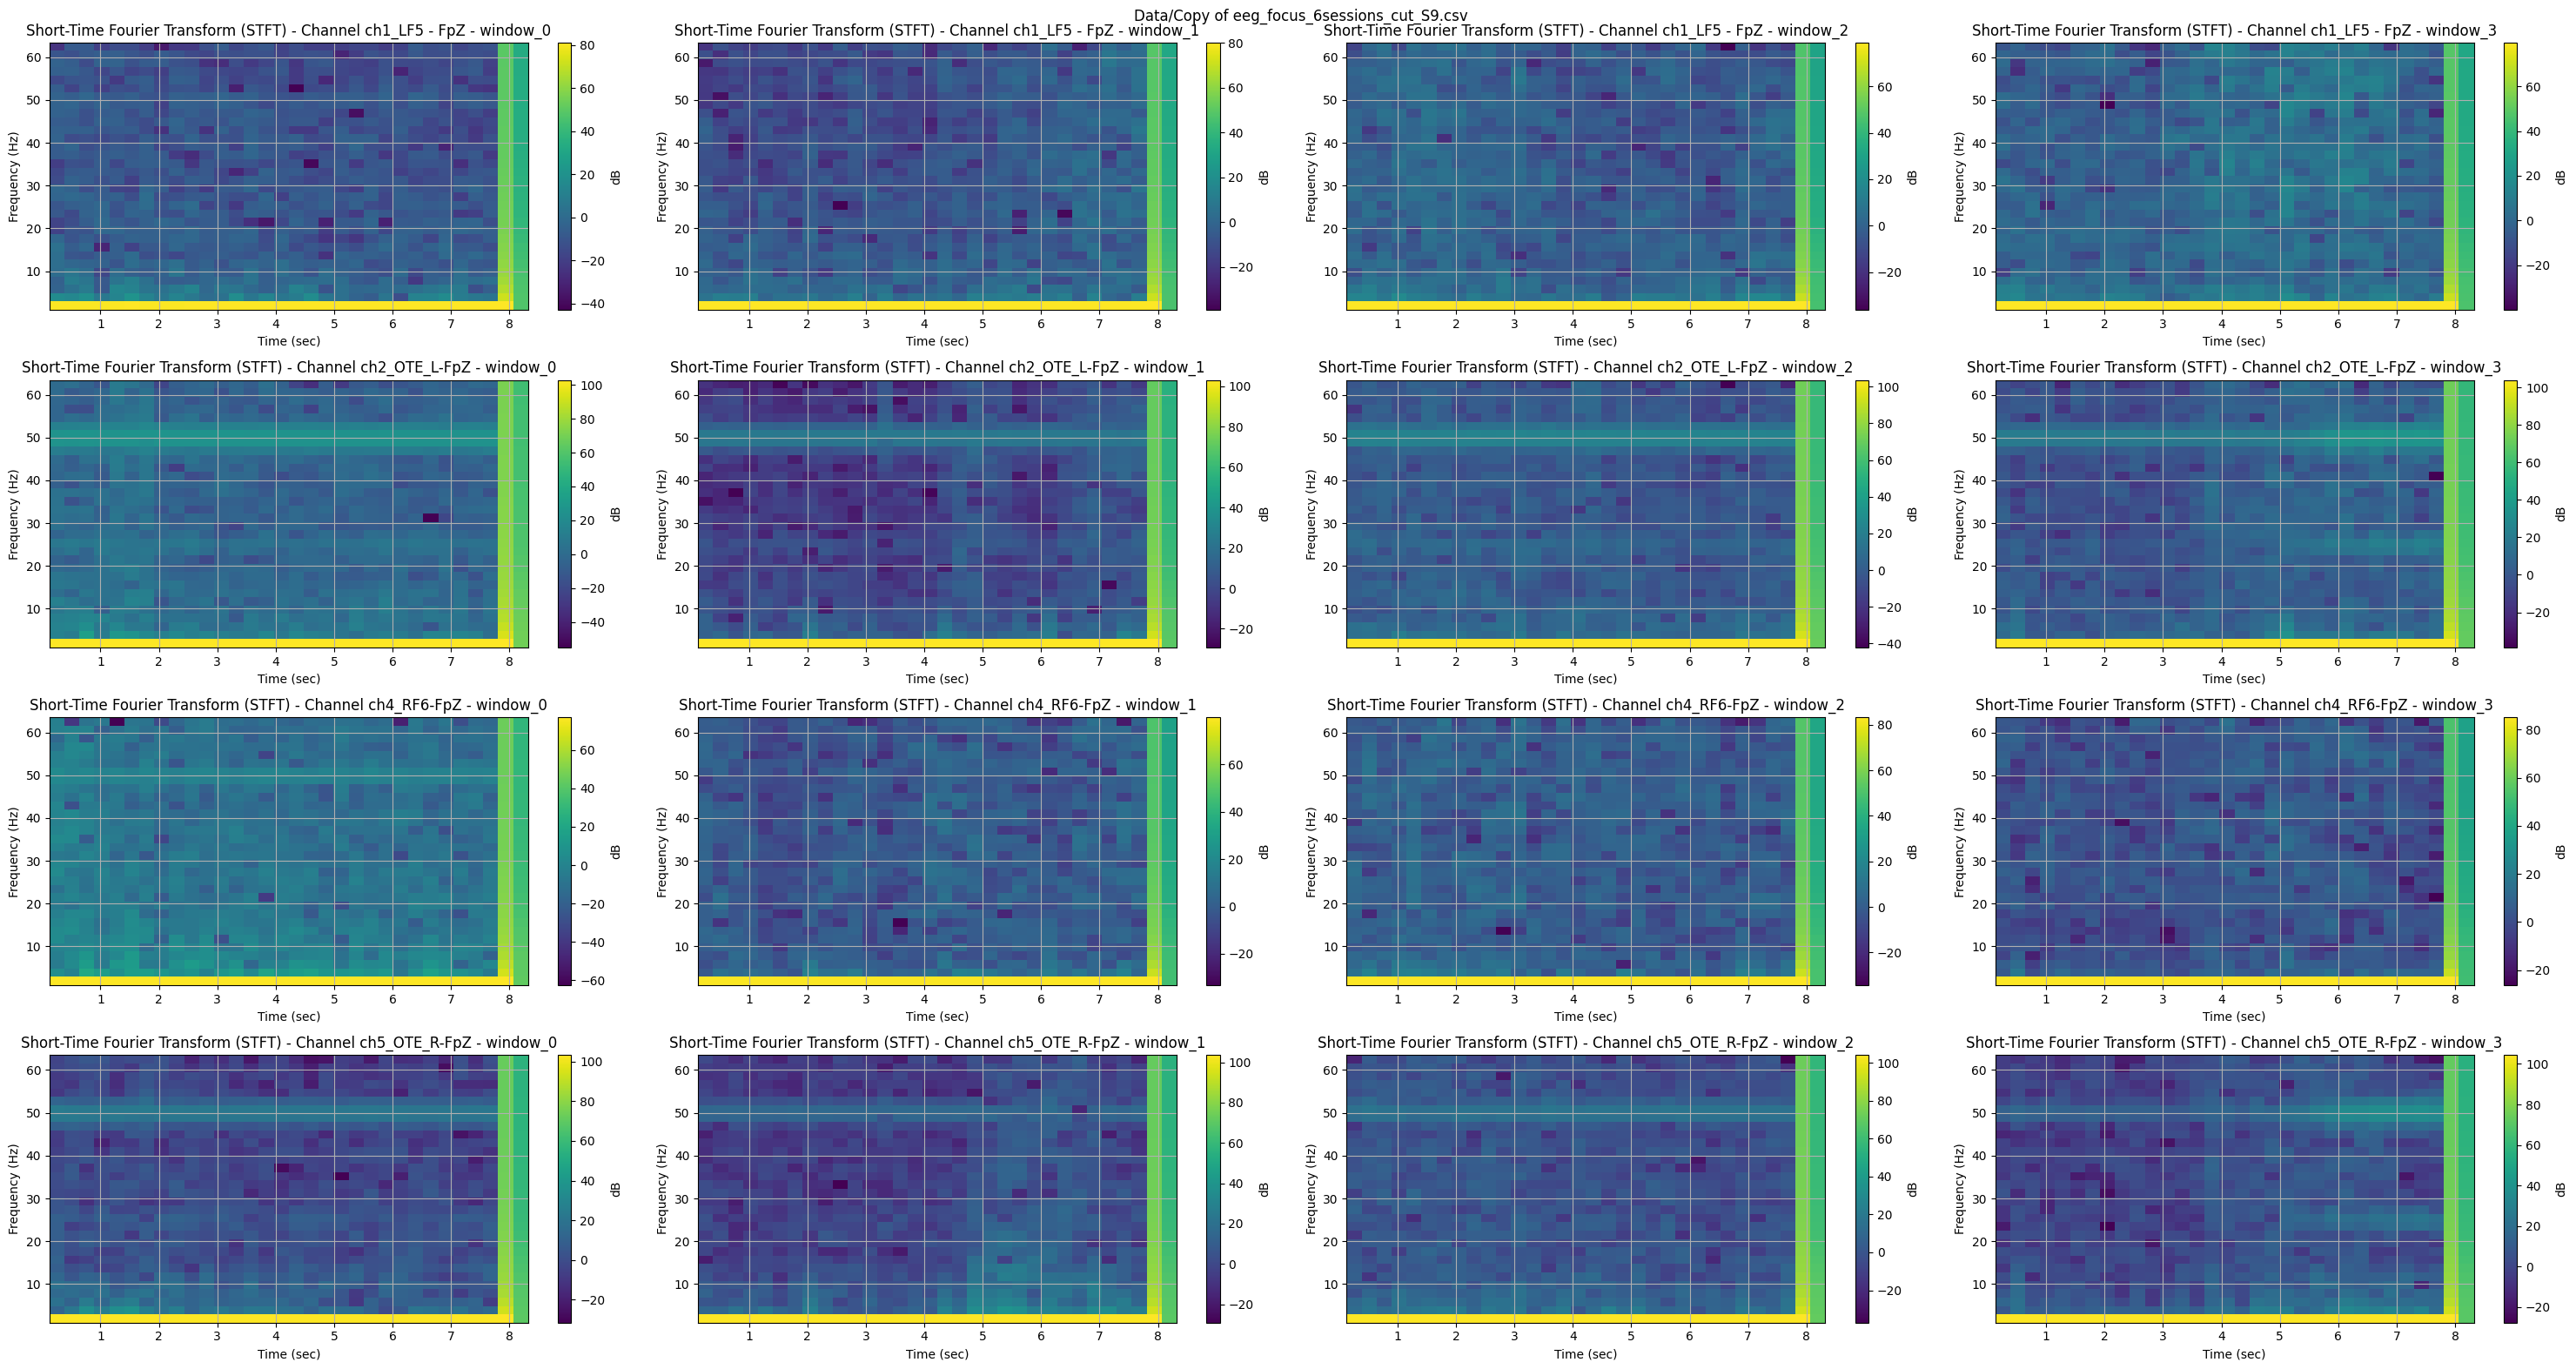

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


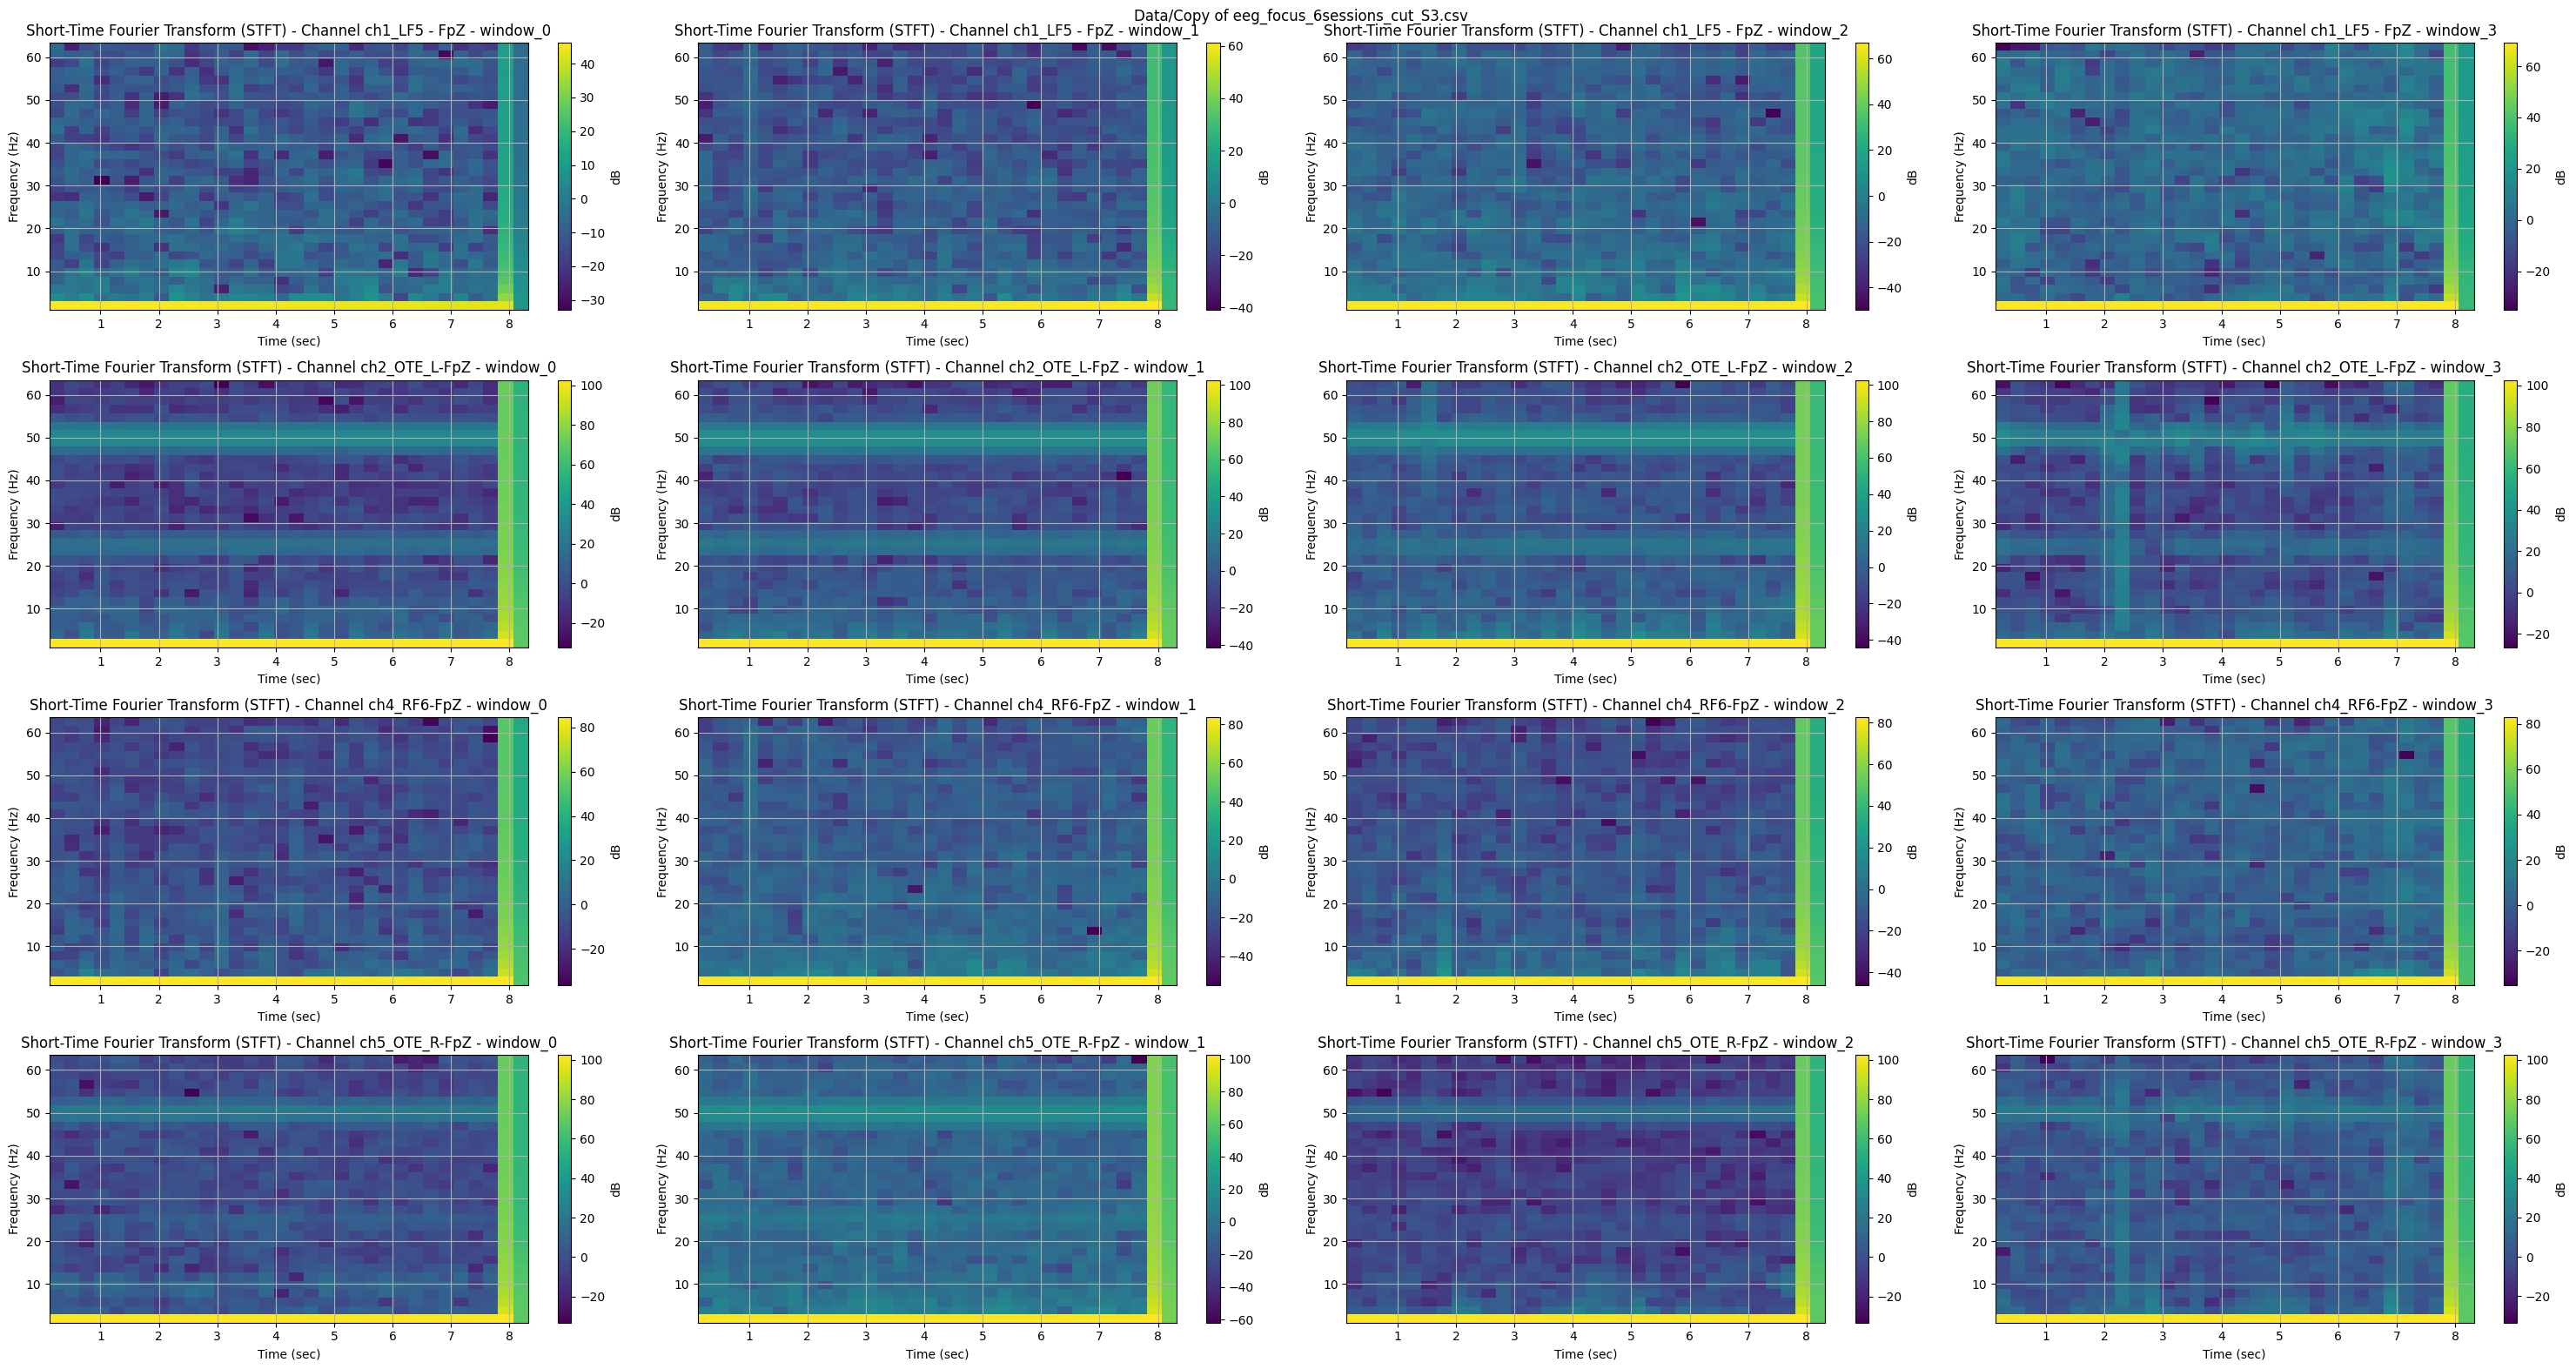

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


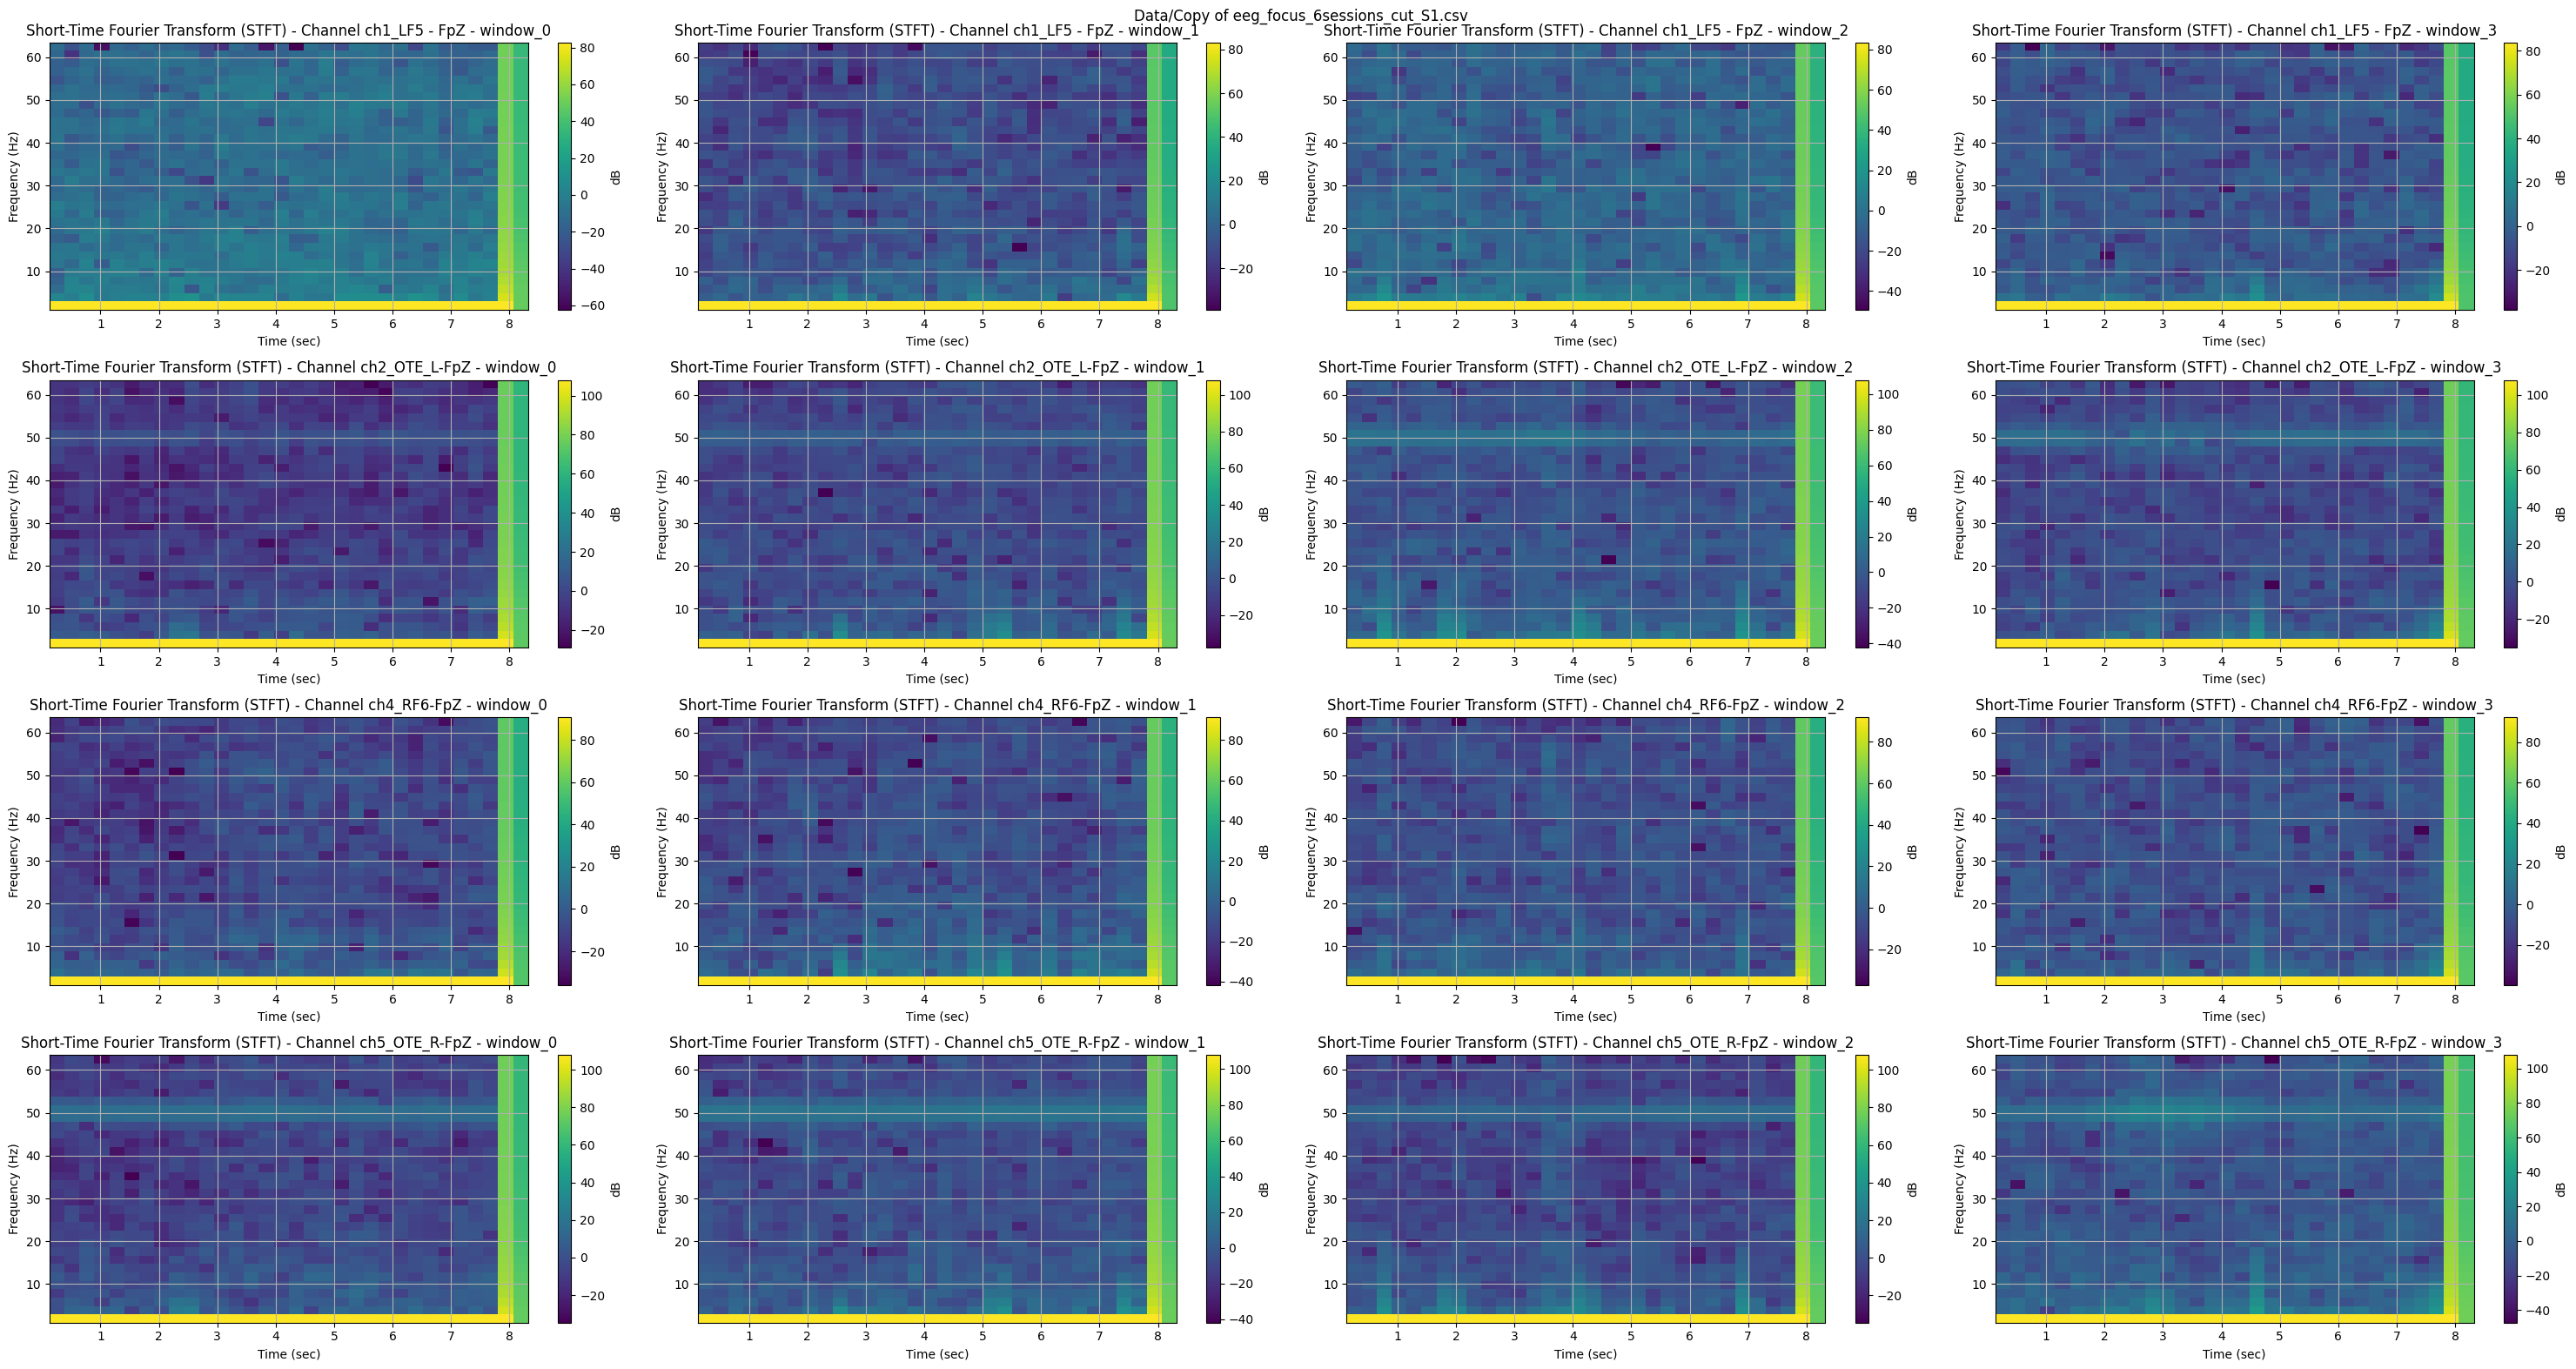

In [15]:
files = ['Data/Copy of eeg_focus_6sessions_cut_S2.csv', 
         'Data/Copy of eeg_focus_6sessions_cut_S3.csv', 
         'Data/Copy of eeg_focus_6sessions_cut_S1.csv']
data_dir = 'Data'
ex_files = []
files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv') and not f.endswith('.processed.csv') and f not in ex_files]

# Define channels used
select_channels = ['ch1_LF5 - FpZ', 'ch2_OTE_L-FpZ', 'ch4_RF6-FpZ', 'ch5_OTE_R-FpZ']

sampling_rate = 125
window_size = 8*sampling_rate
start_idx = 60*sampling_rate
for f in files:
    df = pd.read_csv(f)[select_channels]
    signals_dict = {}
    for channel in select_channels:
        signal_list = []
        # channel = 'ch2_OTE_L-FpZ'
        for i in range(4):
            start_idx = i*120*sampling_rate
            signal = df[channel].values[start_idx:start_idx + window_size]
            signal_list.append(signal)
        signals = np.stack(signal_list, axis=0)
        signals_dict[channel] = signals
    
    plot_signal(signals_dict, title = f, N=len(signal), fs=125, nperseg=64)
